# Исследование корреляции солнечной активности и биржи

In [1]:
import pandas as pd

In [2]:
#url = 'https://www.spaceweather.gc.ca/solar_flux_data/daily_flux_values/fluxtable.txt'
df = pd.read_csv('fluxtable.txt', delim_whitespace=True, skiprows=[1])

# Объединяем fluxdate и fluxtime в одно поле timestamp
df['timestamp'] = pd.to_datetime(df['fluxdate'].astype(str) + df['fluxtime'].astype(str), format='%Y%m%d%H%M%S')

# Удаляем старые колонки fluxdate и fluxtime
df.drop(columns=['fluxdate', 'fluxtime'], inplace=True)

# Перемещаем колонку timestamp в начало
df = df[['timestamp'] + [col for col in df.columns if col != 'timestamp']]
df.head(3)

,timestamp,fluxjulian,fluxcarrington,fluxobsflux,fluxadjflux,fluxursi
0,2004-10-28 17:00:00,2453307.229,2022.605,132.7,130.9,117.8
1,2004-10-28 20:00:00,2453307.354,2022.610,135.8,134.0,120.6
2,2004-10-29 20:00:00,2453308.354,2022.646,130.6,128.8,115.9


In [3]:
solar=df.set_index('timestamp')[['fluxadjflux']].resample('D').mean().reset_index()
solar.head(3)

,timestamp,fluxadjflux
0,2004-10-28,132.450000
1,2004-10-29,130.550000
2,2004-10-30,139.466667


In [4]:
import yfinance as yf

In [5]:
tickers = '''AAPL, MSFT, AMZN, GOOGL, META, TSLA, JNJ, JPM, V, PG, NVDA, WMT, 
             DIS, BAC, MA, INTC, PFE, XOM, NFLX, ADBE, CRM, KO, PEP, GE,
            BABA, TSM, ASML, HD, MCD, UNH, TM, PYPL, COST'''

# Загружаем данные с конкретной начальной даты
raw_data = yf.download(
    tickers=tickers,
    start="2004-10-28",
    interval="1d",
    progress=True,
    group_by='ticker',
    threads=True ,
)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  33 of 33 completed


In [6]:
raw_data.head(3)

Ticker     BABA                       TSLA                        ...  \
Price      Open High Low Close Volume Open High Low Close Volume  ...   
Date                                                              ...   
2004-10-28  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  ...   
2004-10-29  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  ...   
2004-11-01  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  ...   

Ticker          NVDA                                                 WMT  \
Price           Open      High       Low     Close     Volume       Open   
Date                                                                       
2004-10-28  0.112267  0.114636  0.111502  0.112572  561552000  11.877172   
2004-10-29  0.111502  0.113031  0.109592  0.110585  742860000  11.901505   
2004-11-01  0.112114  0.113031  0.110662  0.112955  653892000  11.923612   

Ticker                                                 
Price            High        Low      Close    Volume  
Date                                                   
2004-10-28  12.016487  11.874960  11.939091  25229100  
2004-10-29  12.009861  11.852855  11.923618  30020400  
2004-11-01  11.923612  11.828523  11.908133  26923800  

[3 rows x 165 columns]

In [7]:
# Извлекаем цены закрытия и преобразуем структуру
close_prices = (
    raw_data
    .xs('Close', level=1, axis=1)      # Выбираем уровень Close
    .sort_index()                       # Сортируем по времени
)
close_prices.head(3)

Ticker,BABA,TSLA,MSFT,JPM,COST,NFLX,TSM,DIS,XOM,MA,...,GE,PFE,AMZN,TM,PG,ASML,PYPL,PEP,NVDA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-28,NaN,NaN,17.440012,22.336195,32.506329,1.370000,3.483077,19.968212,24.671709,NaN,...,97.819000,11.836774,1.7225,59.229160,29.297031,9.574495,NaN,28.334299,0.112572,11.939091
2004-10-29,NaN,NaN,17.415108,22.405849,32.324276,1.352857,3.543936,20.047697,24.981310,NaN,...,98.077728,11.935725,1.7065,59.924244,29.222799,9.587950,NaN,28.357178,0.110585,11.923618
2004-11-01,NaN,NaN,17.483604,22.347805,32.459133,1.347143,3.562663,20.055653,24.778286,NaN,...,97.876495,11.873885,1.7550,59.429955,29.120028,9.534123,NaN,28.197037,0.112955,11.908133


In [8]:
# Для солнечных данных
solar = df.set_index('timestamp')[['fluxadjflux']].resample('D').mean()

# Для цен акций (ваш текущий код)
close_prices = raw_data.xs('Close', level=1, axis=1).sort_index()

# Объединяем данные в один DataFrame
combined = solar.join(close_prices, how='inner').dropna()


combined.head(5)

,fluxadjflux,BABA,TSLA,MSFT,JPM,COST,NFLX,TSM,DIS,XOM,...,GE,PFE,AMZN,TM,PG,ASML,PYPL,PEP,NVDA,WMT
2015-07-06,137.633333,77.481850,18.648001,38.638126,51.817482,114.195290,94.571426,17.906916,107.137558,53.746368,...,110.235725,21.282675,21.802000,126.555618,60.979580,93.001106,36.709999,71.564102,0.488217,20.037460
2015-07-07,137.033333,76.892746,17.858667,38.559795,51.409615,118.077965,94.091431,17.922525,108.433952,53.967796,...,110.906128,21.589916,21.836000,126.221909,62.251743,91.395096,36.619999,73.080284,0.479019,20.385553
2015-07-08,132.800000,75.270294,16.997334,38.507572,50.355244,117.573692,93.507141,17.352690,106.665314,53.381687,...,108.475998,21.410690,21.485001,122.150543,61.695618,88.639397,34.700001,72.481407,0.475630,20.183886
2015-07-09,126.366667,76.332611,17.194668,38.751289,50.878563,117.195503,95.727142,17.344889,107.044975,53.140717,...,109.020676,21.673120,21.719500,123.027740,61.444244,90.902359,34.500000,71.708122,0.469821,20.106529
2015-07-10,133.233333,77.549454,17.276667,38.829624,51.602009,119.943665,97.228569,17.618092,107.822815,53.544479,...,110.068138,21.993162,22.175501,125.401917,61.665131,93.712814,34.689999,72.435913,0.478051,20.200457


In [9]:
# сохраним промежуточные данные тк у Yahoo Finance серьезные лимиты на IP
to_save = combined.round(4)
to_save.to_csv('combined.csv')
del to_save

In [10]:
# Рассчитываем корреляции с статистической значимостью
from scipy.stats import pearsonr
ticker_columns = [col for col in combined.columns if col != 'fluxadjflux']

corr_list = []
for ticker in ticker_columns:
    r, p_value = pearsonr(combined['fluxadjflux'], combined[ticker])
    corr_list.append({
        'Ticker': ticker,
        'Correlation': r,
        'p-value': p_value,
        'Significant (5%)': p_value < 0.05
    })

corr_df = pd.DataFrame(corr_list).sort_values('Correlation', key=abs, ascending=False)

print("Детализированные результаты корреляции:")
print(corr_df)

Детализированные результаты корреляции:
   Ticker  Correlation        p-value  Significant (5%)
8     XOM     0.836536   0.000000e+00              True
4    COST     0.781889   0.000000e+00              True
31   NVDA     0.769953   0.000000e+00              True
10   AAPL     0.733351   0.000000e+00              True
11     KO     0.727786   0.000000e+00              True
2    MSFT     0.713612   0.000000e+00              True
15    UNH     0.697082   0.000000e+00              True
32    WMT     0.690330   0.000000e+00              True
16  GOOGL     0.684603   0.000000e+00              True
30    PEP     0.682099   0.000000e+00              True
27     PG     0.671255  6.221826e-317              True
6     TSM     0.668047  7.733128e-313              True
3     JPM     0.666700  3.908841e-311              True
28   ASML     0.665452  1.451501e-309              True
20    MCD     0.659707  1.969412e-302              True
17     HD     0.634742  3.450886e-273              True
9      M

# Проверка

Если эффект есть, значит он должен быть устойчивым.
Просто разделим данные на два промежутка. Выберем дату произвольно

In [11]:
# Разделяем данные на две части по дате
split_date = '2019-01-01'

combined_before = combined.loc[:split_date]  # Все данные ДО 2019-01-01
combined_after = combined.loc[split_date:]   # Все данные ПОСЛЕ 2019-01-01 (включительно)

In [12]:
combined_before.head(3)

,fluxadjflux,BABA,TSLA,MSFT,JPM,COST,NFLX,TSM,DIS,XOM,...,GE,PFE,AMZN,TM,PG,ASML,PYPL,PEP,NVDA,WMT
2015-07-06,137.633333,77.481850,18.648001,38.638126,51.817482,114.195290,94.571426,17.906916,107.137558,53.746368,...,110.235725,21.282675,21.802000,126.555618,60.979580,93.001106,36.709999,71.564102,0.488217,20.037460
2015-07-07,137.033333,76.892746,17.858667,38.559795,51.409615,118.077965,94.091431,17.922525,108.433952,53.967796,...,110.906128,21.589916,21.836000,126.221909,62.251743,91.395096,36.619999,73.080284,0.479019,20.385553
2015-07-08,132.800000,75.270294,16.997334,38.507572,50.355244,117.573692,93.507141,17.352690,106.665314,53.381687,...,108.475998,21.410690,21.485001,122.150543,61.695618,88.639397,34.700001,72.481407,0.475630,20.183886


In [13]:
combined_after.head(3)

,fluxadjflux,BABA,TSLA,MSFT,JPM,COST,NFLX,TSM,DIS,XOM,...,GE,PFE,AMZN,TM,PG,ASML,PYPL,PEP,NVDA,WMT
2019-01-02,72.400000,132.017548,20.674667,95.310532,82.916199,186.144638,267.660004,31.658152,106.340652,51.719864,...,37.585014,31.420744,76.956497,116.279999,77.998947,147.041672,85.750000,91.920586,3.378090,28.292692
2019-01-03,70.533333,126.126511,20.024000,91.804253,81.737816,182.199188,271.200012,29.785706,103.764351,50.925774,...,37.631699,30.541677,75.014000,114.650002,77.452087,138.932251,82.089996,91.062622,3.173996,28.147200
2019-01-04,69.566667,134.963089,21.179333,96.074005,84.751137,187.490067,297.570007,30.314499,106.965202,52.803391,...,38.425415,31.239115,78.769501,119.730003,79.032898,144.943741,86.269997,92.929977,3.377346,28.323008


In [14]:

# Создаем функцию для расчета корреляций
def calculate_correlations(df):
    corr_list = []
    for ticker in df.columns.drop('fluxadjflux'):
        r, p_value = pearsonr(df['fluxadjflux'], df[ticker])
        corr_list.append({
            'Ticker': ticker,
            'Correlation': r,
            'p-value': p_value,
            'Significant (5%)': p_value < 0.05
        })
    return pd.DataFrame(corr_list).sort_values('Correlation', key=abs, ascending=False)

# Считаем для первого периода
print("Корреляции ДО 2019-01-01:")
corr_before = calculate_correlations(combined_before)
print(corr_before)

# Считаем для второго периода
print("\nКорреляции ПОСЛЕ 2019-01-01:")
corr_after = calculate_correlations(combined_after)
print(corr_after)

Корреляции ДО 2019-01-01:
   Ticker  Correlation        p-value  Significant (5%)
6     TSM    -0.762401  3.832969e-168              True
22    JNJ    -0.757000  1.933901e-164              True
3     JPM    -0.738216  2.778401e-152              True
15    UNH    -0.727898  4.847115e-146              True
16  GOOGL    -0.713247  1.172753e-137              True
31   NVDA    -0.713022  1.563118e-137              True
13    BAC    -0.708067  8.097022e-135              True
20    MCD    -0.702853  5.058934e-132              True
32    WMT    -0.700630  7.536376e-131              True
30    PEP    -0.700262  1.176246e-130              True
2    MSFT    -0.698811  6.747124e-130              True
17     HD    -0.688992  7.022828e-125              True
28   ASML    -0.681065  5.666940e-121              True
12   META    -0.678185  1.387279e-119              True
19   INTC    -0.677814  2.088931e-119              True
25   AMZN    -0.667367  1.657606e-114              True
14   ADBE    -0.661755

**ВЫВОДЫ**: Эффект не повторился в двух разных промежутках времени


# Графики
все же попробуем графически понять почему некоторые тикеры  хорошо коррелируют

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_ticker_correlation(ticker, df=combined):
    """
    Анализирует корреляцию между солнечной активностью и указанным тикером.
    
    Параметры:
    ticker (str): Название тикера (например, 'XOM')
    df (DataFrame): DataFrame с данными (по умолчанию combined)
    """
    # Проверка наличия тикера
    if ticker not in df.columns:
        print(f"Ошибка: Тикер {ticker} отсутствует в данных")
        return
    
    # Создаем копию данных для безопасной обработки
    data = df[['fluxadjflux', ticker]].copy()
    
    # Нормализация данных
    def manual_minmax_scale(series):
        return (series - series.min()) / (series.max() - series.min())
    
    data_norm = pd.DataFrame({
        'fluxadjflux_norm': manual_minmax_scale(data['fluxadjflux']),
        f'{ticker}_norm': manual_minmax_scale(data[ticker])
    }, index=data.index)
    
    # График временных рядов
    plt.figure(figsize=(14, 6))
    plt.title(f'Сравнение нормализованных рядов: Солнечная активность vs {ticker}')
    
    plt.plot(data_norm['fluxadjflux_norm'], 
             label='Solar Flux (norm)', 
             color='orange',
             alpha=0.7)
    
    plt.plot(data_norm[f'{ticker}_norm'], 
             label=f'{ticker} Price (norm)', 
             color='blue',
             alpha=0.5,
             linestyle='--')
    
    plt.legend()
    plt.xlabel('Дата')
    plt.ylabel('Нормализованные значения')
    plt.grid(True)
    plt.show()
    
    # Scatter plot с регрессией
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data['fluxadjflux'], 
                y=data[ticker],
                scatter_kws={'alpha':0.3, 'color':'green'},
                line_kws={'color':'red'})
    
    plt.title(f'Корреляция: Солнечный Flux vs Цена {ticker}')
    plt.xlabel('Solar Flux Adjusted')
    plt.ylabel(f'{ticker} Stock Price')
    plt.grid(True)
    
    # Рассчет корреляции
    r = data['fluxadjflux'].corr(data[ticker])
    plt.annotate(f'Pearson r = {r:.2f}\nN = {len(data):,}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction',
                 fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()


Нарисуем лучший случай

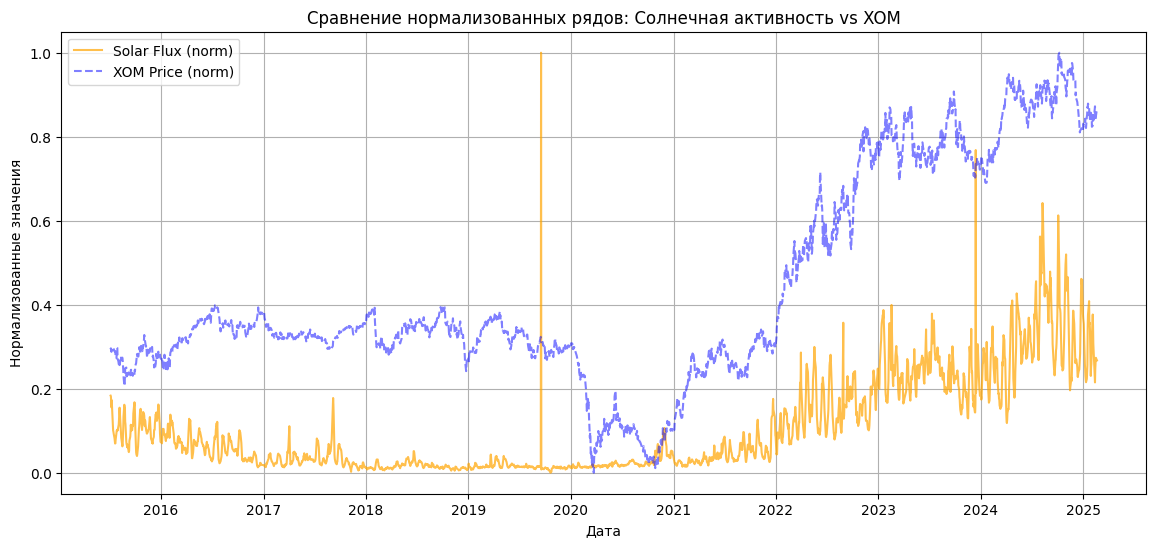

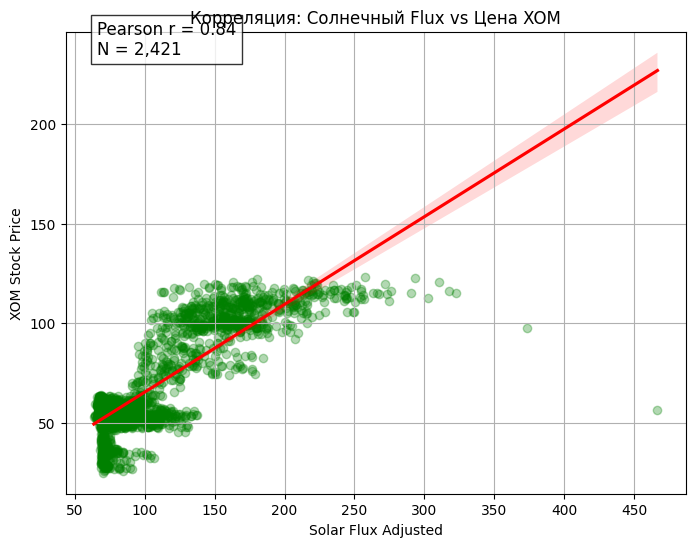

In [16]:

analyze_ticker_correlation('XOM')

Нарисуем худший случай

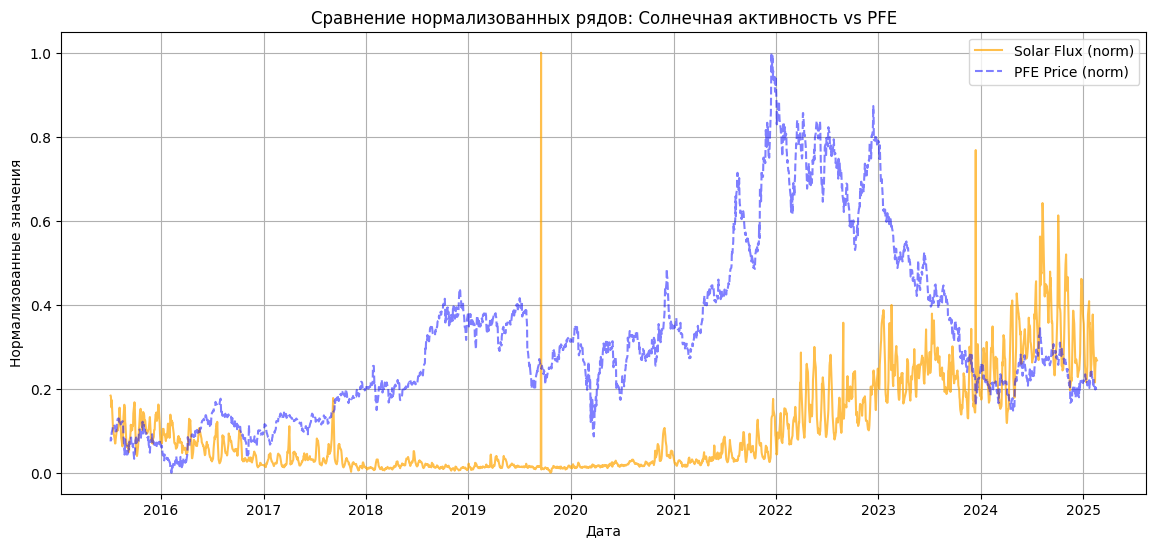

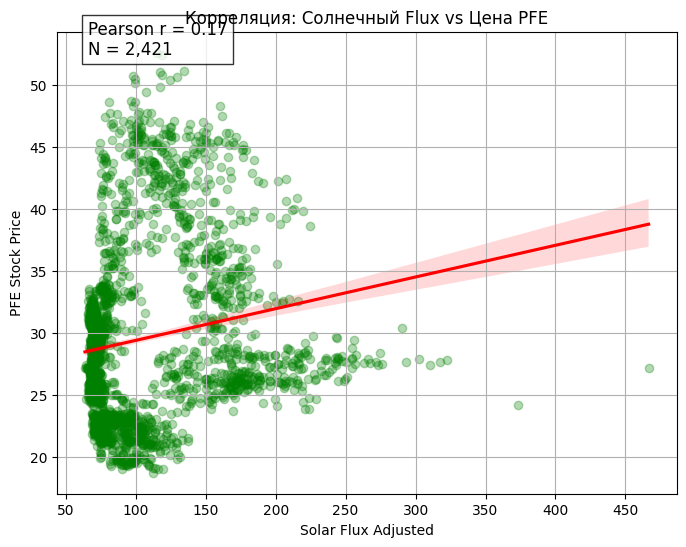

In [17]:
analyze_ticker_correlation('PFE')

# Выводы

- На Солнце есть длинные циклы.
- Иногда эти циклы совпадают с развитием компаний.
- Иногда эта корреляция довольно высокая
- Прогностическая сила солнечной активности не подтвердилась.